In [0]:
# Batch Normalization
# 每一個input feature 獨立做 normalization
# 利用 batch statistics 做 normalization 而非整份資料，可解決gradient vanishing的問題，可以用較大的learning rate並取代dropout & regularize

In [2]:
import os
import keras
import itertools

Using TensorFlow backend.


In [12]:
train,test = keras.datasets.cifar10.load_data()

def preprocessing_x(x,flatten = True):
  x = x / 255.
  if flatten:
    print(x.shape)
    # convert 32 32 3 to 1 dimension
    x = x.reshape((len(x),-1))
    print(x.shape)
  return x

def preprocessing_y(y,num_classes=10):
  if y.shape[-1] == 1:
    y = keras.utils.to_categorical(y,num_classes)
  return y

x_train, y_train = train
x_test, y_test = test

x_train = preprocessing_x(x_train)
x_test = preprocessing_x(x_test)

y_train = preprocessing_y(y_train)
y_test = preprocessing_y(y_test)

from keras.layers import BatchNormalization

def build_mlp(input_shape,output_units=10,num_neurons=[512,256,128]):
  input_layer = keras.layers.Input(input_shape)

  for i,n_units in enumerate(num_neurons):
    if i==0:
      x = keras.layers.Dense(units = n_units,activation='relu',name='hidden_layer'+str(i+1))(input_layer)
      x = BatchNormalization()(x)
    else:
      x = keras.layers.Dense(units = n_units,activation='relu',name='hidden_layer'+str(i+1))(x)
      x = BatchNormalization()(x)
    out = keras.layers.Dense(units = output_units,activation='softmax',name='output')(x)

    model = keras.models.Model(inputs = [input_layer],outputs=[out])
    return model
  


(50000, 32, 32, 3)
(50000, 3072)
(10000, 32, 32, 3)
(10000, 3072)


In [15]:
learning_rate = 1e-3
epochs=20
batch_size = 1024
momentum = 0.95

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=learning_rate, nesterov=True, momentum=momentum)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=epochs, 
          batch_size=batch_size, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
output (Dense)               (None, 10)                5130      
Total params: 1,580,554
Trainable params: 1,579,530
Non-trainable params: 1,024
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 8s 157us/step - loss: 2.1069 - acc: 0.2831 - val_loss: 1.9682 - val_acc: 0.3404
Epoch 2/20
50000/50000 [==============================]

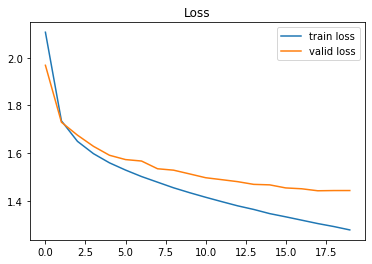

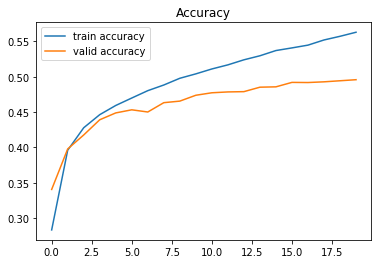

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()